##**Bhoopendra kumar**
##**ML  Titanic  Survival  Prediction**

In [ ]:
#import necessery libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import Dataset 
titanic=sns.load_dataset('titanic')
#print the first 20 rows of the datset
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
#Chech the shape of the dataset
titanic.shape

(891, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

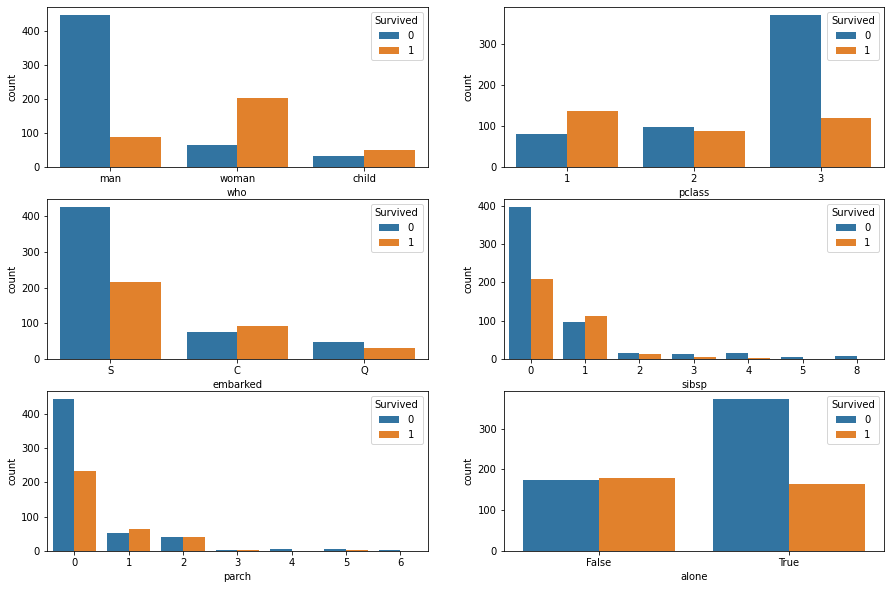

In [ ]:
#check the coutplot of differenet colums to check the survived probability of a passenger
n_col=2
n_row=3
column=['who','pclass','embarked','sibsp','parch','alone']
fig, axs = plt.subplots(n_row,n_col,figsize=(n_row*5,n_col*5))
for i in range(n_row):
  for j in range(n_col):
    ax=axs[i][j]
    n=i*n_col+j
    sns.countplot(titanic[column[n]],hue=titanic['survived'],ax=ax)
    #ax.set_title(column[n])
    ax.legend(title='Survived',loc='upper right')
fig.show()


In [ ]:
#descrive mathmatical colums of dataset
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# check the null values present in the dataset
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# check all unnecessary columns present in the dataset
print('deck column null value % ={}%'.format((titanic['deck'].isnull().sum()*100)/len(titanic)))


deck column null value % =77.21661054994388%


In [ ]:
# deck column have too much null values so its better to drop this column and some another repetative columns are there
drop_columns=['deck','embark_town','alive','alone','adult_male','who','class']
titanic.drop(drop_columns,axis=1,inplace=True)

In [ ]:
#check the dataset again
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [ ]:
#fill null values in the dataset by statistics analysis
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
#we can fill the null values in age column by mean values of the column 
titanic['age'].fillna(titanic['age'].mean(),inplace=True)

In [ ]:
#we can fill embarked nan value also by mean value
titanic['embarked'].mode()

0    S
dtype: object

In [ ]:
titanic['embarked'].fillna('S',inplace=True)

In [ ]:
#check null values again
titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

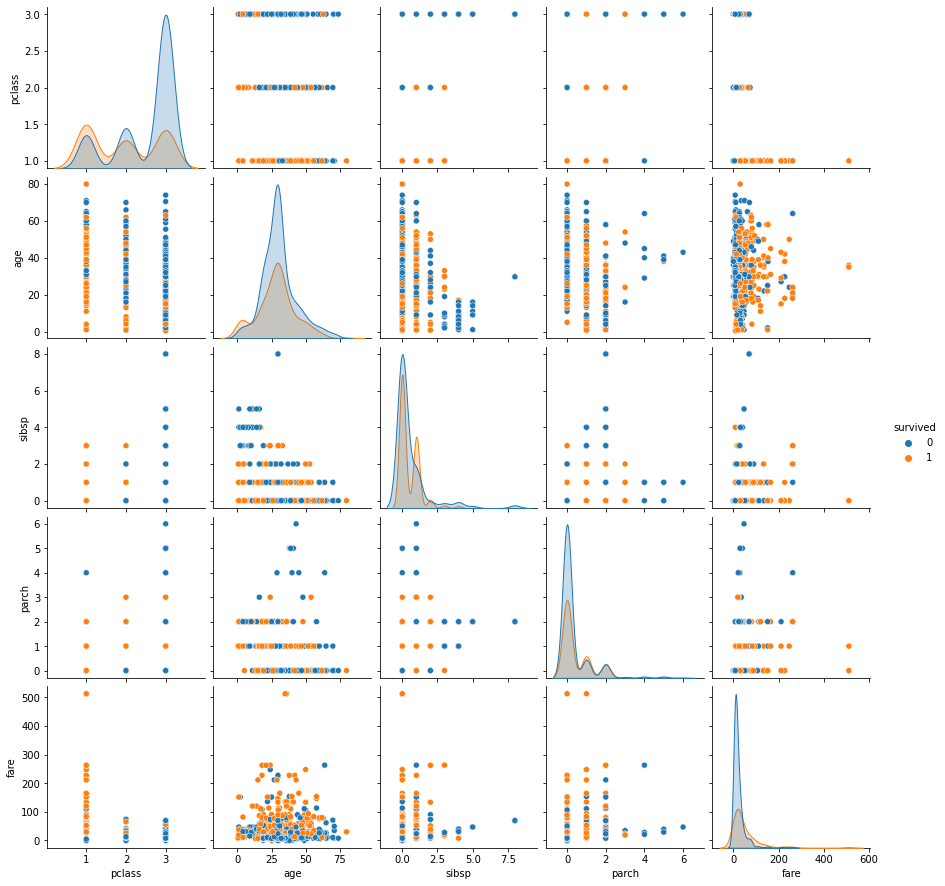

In [ ]:
sns.pairplot(titanic,hue='survived')

In [ ]:
#survived rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
#check the shape of databese
titanic.shape

(891, 8)

In [ ]:
#check datatype every column
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
print(pd.unique(titanic['sex']))
print(pd.unique(titanic['embarked']))

['male' 'female']
['S' 'C' 'Q']


In [ ]:
#encode string data to numeric values
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

#encode sex column
titanic['sex']=label_encoder.fit_transform(titanic['sex'])

#encode embarked column
titanic['embarked']=label_encoder.fit_transform(titanic['embarked'])


In [ ]:
print(pd.unique(titanic['sex']))
print(pd.unique(titanic['embarked']))

[1 0]
[2 0 1]


In [ ]:
#check dataset again
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


In [ ]:
#Split the data into dependent variable Y and independent variable X
X=titanic.drop(['survived'],axis=1)
Y=titanic['survived']
print(X.shape)
print(Y.shape)


(891, 7)
(891,)


In [ ]:
#split data into training and test data with test data 20%
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#check the shape of training and testing dataset 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
#define classification models
def model(X_train,Y_train):
  #use logistic
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression()
  log.fit(X_train,Y_train)

  #use KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
  knn.fit(X_train,Y_train)

  #use SVC with linear kernal
  from sklearn.svm import SVC
  svc_lin=SVC(kernel='linear',random_state=0)
  svc_lin.fit(X_train,Y_train)

  #use SVC with rbf kernal
  from sklearn.svm import SVC
  svc_rbf=SVC(kernel='rbf',random_state=0)
  svc_rbf.fit(X_train,Y_train)

  #use Gaussian Naive baise
  from sklearn.naive_bayes import GaussianNB
  GNB=GaussianNB()
  GNB.fit(X_train,Y_train)

  #use decition Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(X_train,Y_train)

  #use random forest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  forest.fit(X_train,Y_train)

  #print the training accuracy of each model
  print('[0] Logistic regerssion training accuracy: ',log.score(X_train,Y_train))
  print('[1] KNN training accuracy: ',knn.score(X_train,Y_train))
  print('[2] SVC(linear kernal) training accuracy: ',svc_lin.score(X_train,Y_train))
  print('[3] SVC(rbf kernal) training accuracy: ',svc_rbf.score(X_train,Y_train))
  print('[4] Gaussian NB training accuracy: ',GNB.score(X_train,Y_train))
  print('[5] Decition tree training accuracy: ',tree.score(X_train,Y_train))
  print('[6] Random forest training accuracy: ',forest.score(X_train,Y_train))


  return log,knn,svc_lin,svc_rbf,GNB,tree,forest



In [ ]:
model=model(X_train,Y_train)

[0] Logistic regerssion training accuracy:  0.7963483146067416
[1] KNN training accuracy:  0.8707865168539326
[2] SVC(linear kernal) training accuracy:  0.7865168539325843
[3] SVC(rbf kernal) training accuracy:  0.8426966292134831
[4] Gaussian NB training accuracy:  0.7893258426966292
[5] Decition tree training accuracy:  0.9817415730337079
[6] Random forest training accuracy:  0.9676966292134831


In [ ]:
#confusion matrix and test accuracy of every model
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  #confusion matirx
  cm=confusion_matrix(Y_test,model[i].predict(X_test))

  #accuracy
  TN,FP,FN,TP=confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
  test_score=(TP+TN)/(TN+TP+FN+FP)

  print(cm)
  print('model[{}] testing accuracy ="{}"'.format(i,test_score))
  print()



[[96 14]
 [19 50]]
model[0] testing accuracy ="0.8156424581005587"

[[97 13]
 [23 46]]
model[1] testing accuracy ="0.7988826815642458"

[[92 18]
 [20 49]]
model[2] testing accuracy ="0.7877094972067039"

[[98 12]
 [22 47]]
model[3] testing accuracy ="0.8100558659217877"

[[90 20]
 [17 52]]
model[4] testing accuracy ="0.7932960893854749"

[[83 27]
 [22 47]]
model[5] testing accuracy ="0.7262569832402235"

[[103   7]
 [ 25  44]]
model[6] testing accuracy ="0.8212290502793296"



In [ ]:
#check importance of features for the model
forest=model[6]
importance=pd.DataFrame({'feature':titanic.iloc[:,1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importance=importance.sort_values('importance',ascending=False).set_index('feature')
importance

,importance
feature,
age,0.300
fare,0.265
sex,0.237
pclass,0.078
sibsp,0.054
parch,0.036
embarked,0.031


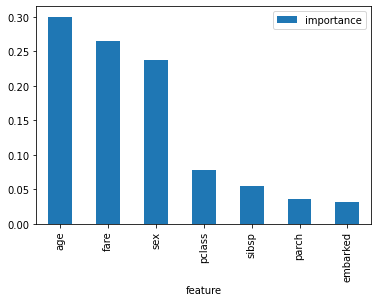

In [ ]:
#visulization importance
importance.plot(kind='bar')

In [ ]:
#predict features
Y_pred=model[6].predict(X_test)
print(Y_pred)
print(Y_test)

[0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: survived, Length: 179, dtype: int64
